In [1]:
#importing libraries
import pandas as pd
import numpy as np
import datetime
import warnings
#below removes warinings so it looks cleaner 
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed") 


from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#what does % mean, magic function 6, this makes the plot display just after without writing the code to display it ?? 
#search up what it does 

pd.set_option('display.max_columns', None) # want to see all the columns 

In [2]:
data = pd.read_csv("/Users/Bijou/Desktop/we_fn_use_c_marketing_customer_value_analysiscopy.csv")

In [3]:
data.shape

(9134, 24)

In [4]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

In [5]:
#himanshu answer 

numericals = data.select_dtypes(np.number) 
numericals.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [6]:
numericals = numericals.dropna()

In [7]:
numericals.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [8]:
#could have stored the upper and lower limits into a list ? or pairs 

#mind end up losing more data than if you find the upper and lower limit for each column individually 

def outliers_remove(df,col):
    iqr = np.percentile(df[col],75) - np.percentile(df[col],25)
    upper_limit = np.percentile(data[col],75) + 1.5*iqr #you can change the 1.5 according to your analysis 
    lower_limit = np.percentile(data[col],25) - 1.5*iqr
    df[col]=df[(df[col]<upper_limit) & (df[col]>lower_limit)]
    return df # to make sure that the points dont all get removed after each time 


In [9]:
outliers_remove(numericals,numericals.columns)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,NaN,NaN,69,32,5,0,1,384.811147
1,NaN,0.0,94,13,42,0,8,1131.464935
2,NaN,NaN,108,18,38,0,2,566.472247
3,NaN,0.0,106,18,65,0,7,529.881344
4,NaN,NaN,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,NaN,NaN,73,18,89,0,2,198.234764
9130,NaN,NaN,79,14,28,0,1,379.200000
9131,NaN,0.0,85,9,37,3,2,790.784983
9132,NaN,NaN,96,34,3,0,3,691.200000


In [69]:
column_names=list(data.select_dtypes(np.number).columns)
column_names

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']

In [70]:
#make box plots for all of the numerical data 

In [86]:

def calculate_iqr(i):
    iqr = np.percentile(data[i],75) - np.percentile(data[i],25)
    upper_limit = np.percentile(data[i],75) + 1.5*iqr #you can change the 1.5 according to your analysis 
    lower_limit = np.percentile(data[i],25) - 1.5*iqr
    data[i]=data[(data[i]<upper_limit) & (data[i]>lower_limit)]
    print(upper_limit)
    print(lower_limit) 
    
    
    

In [87]:
upper_lowerlimit=list(map(calculate_iqr,data.select_dtypes(np.number).columns)) 
upper_lowerlimit

16414.039911750002
-3457.6210762500014
155800.0
-93480.0
170.5
6.5
48.5
-19.5
141.5
-46.5
0.0
0.0
8.5
-3.5
960.3997301249999
-140.62664687499995


[None, None, None, None, None, None, None, None]

In [89]:
data.shape

(9134, 24)

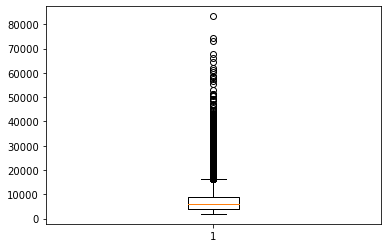

In [41]:
plt.boxplot(data['Customer Lifetime Value'], notch=None, vert=None, patch_artist=None, widths=None) 
plt.show()

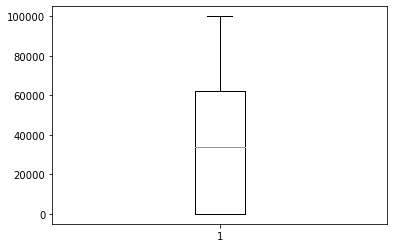

In [42]:
plt.boxplot(data['Income'], notch=None, vert=None, patch_artist=None, widths=None) 
plt.show()

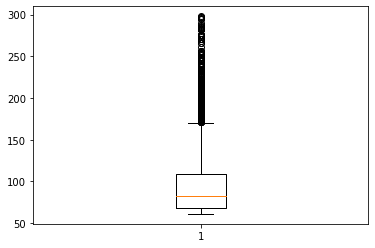

In [43]:
plt.boxplot(data['Monthly Premium Auto'], notch=None, vert=None, patch_artist=None, widths=None) 
plt.show()

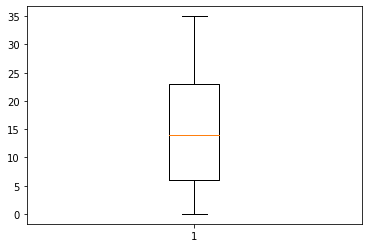

In [44]:
plt.boxplot(data['Months Since Last Claim'], notch=None, vert=None, patch_artist=None, widths=None) 
plt.show()

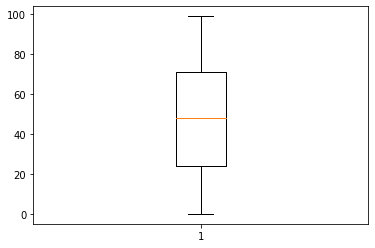

In [45]:
plt.boxplot(data['Months Since Policy Inception'], notch=None, vert=None, patch_artist=None, widths=None) 
plt.show()

In [ ]:
# might need to be catagorized as categorical 

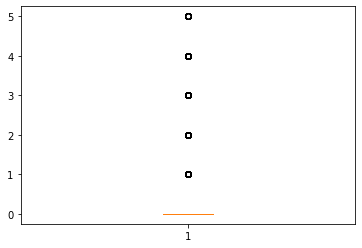

In [46]:
plt.boxplot(data['Number of Open Complaints'], notch=None, vert=None, patch_artist=None, widths=None) 
plt.show()

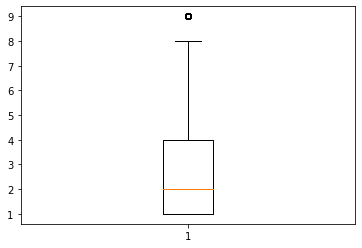

In [47]:
plt.boxplot(data['Number of Policies'], notch=None, vert=None, patch_artist=None, widths=None) 
plt.show()

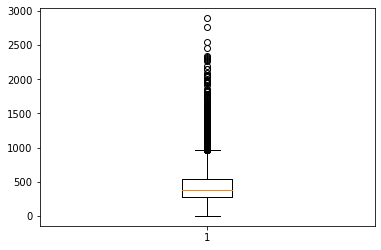

In [48]:
#print(box_plots_new,'Customer Lifetime Value') 
plt.boxplot(data['Total Claim Amount'], notch=None, vert=None, patch_artist=None, widths=None) 
plt.show()

In [96]:
def box_plots_new(i):
    plt.boxplot(data[i], notch=None, vert=None, patch_artist=None, widths=None) 
    plt.show()



In [97]:
print(box_plots_new,data['Customer Lifetime Value'])

<function box_plots_new at 0x7ff98dc76160> 0        2763.519279
1        6979.535903
2       12887.431650
3        7645.861827
4        2813.692575
            ...     
9129    23405.987980
9130     3096.511217
9131     8163.890428
9132     7524.442436
9133     2611.836866
Name: Customer Lifetime Value, Length: 9134, dtype: float64


In [49]:
#list(map(box_plots_new,column_names))


### 2. Create a copy of the dataframe for the data wrangling.

In [56]:
newdat=data.copy

### 3.Normalize the continuous variables. You can use any one method you want.

In [73]:
y = data['Customer Lifetime Value']
X = data.drop(['Customer Lifetime Value'], axis=1)

In [74]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = np.object)

In [77]:
transformer = StandardScaler() 
transformer.fit(X_num)
x_standardized = transformer.transform(X_num) 
x_standardized

array([[ 0.61282744, -0.70392465,  1.67809933, ..., -0.42224956,
        -0.82264788, -0.16963969],
       [-1.23961684,  0.02269103, -0.2081864 , ..., -0.42224956,
         2.10615996,  2.400737  ],
       [ 0.36570978,  0.42959581,  0.28820458, ..., -0.42224956,
        -0.40424676,  0.45573376],
       ...,
       [-1.23961684, -0.23889062, -0.60529919, ...,  2.87324529,
        -0.40424676,  1.22793667],
       [-0.51735647,  0.08082028,  1.87665573, ..., -0.42224956,
         0.01415436,  0.88511256],
       [-1.23961684, -0.47140763, -1.20096836, ..., -0.42224956,
        -0.82264788, -0.22200449]])

### 4.Encode the categorical variables

In [ ]:
#not done 

In [131]:
cat=data.select_dtypes(np.object) 
cat

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [137]:
pd.get_dummies(data['State'])  
#does not differentiate between different categories 

,Arizona,California,Nevada,Oregon,Washington
0,0,0,0,0,1
1,1,0,0,0,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
9129,0,1,0,0,0
9130,0,1,0,0,0
9131,0,1,0,0,0
9132,0,1,0,0,0


In [135]:
pd.get_dummies(data['State']) 

data['Coverage']=data['Coverage'].map({'Basic':0,'Extended':1,'Premium':2})




In [138]:
data = data[data['Gender']].isin(['F','M','U'])

KeyError: "None of [Index(['F', 'F', 'F', 'M', 'M', 'F', 'F', 'M', 'M', 'F',\n       ...\n       'M', 'M', 'M', 'M', 'F', 'M', 'F', 'M', 'M', 'M'],\n      dtype='object', length=9134)] are in the [columns]"

In [140]:
data = data[data['Gender']].isin(['F','M','U'])
data['Gender_ordinal']=data['Gender'].map({'F':0,'M':1,'U':2})
#if you want to apply weight to your categories 
data['Gender_ordinal'].value_count()


KeyError: "None of [Index(['F', 'F', 'F', 'M', 'M', 'F', 'F', 'M', 'M', 'F',\n       ...\n       'M', 'M', 'M', 'M', 'F', 'M', 'F', 'M', 'M', 'M'],\n      dtype='object', length=9134)] are in the [columns]"

- One hot to state
- Ordinal to coverage,creates a dummy column for each one 
- Ordinal to employmentstatus
- Ordinal to location code
- One hot to marital status
- One hot to policy type
- One hot to policy
- One hot to renew offercustomer_df
- One hot to sales channel
- One hot vehicle class
- Ordinal vehicle size

- data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
 given that column "coverage" in the dataframe "data" has three categories:
 "basic", "extended", and "premium" and values are to be represented in the same order.

In [76]:
cat=data.select_dtypes(np.object) 
cat

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


### 5.The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [ ]:
# we did this in a previous activity 

### 6.Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

- change effective to date to the other group nothing else needs to be changed  
- basically right before you train the model you want eveything to be numerical before you run it 

In [3]:
data.select_dtypes(np.number)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [4]:
data.select_dtypes(np.object)

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [5]:
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object